In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [134]:
df = pd.read_excel("E:/Aimit/ML/proj1_shuffled - Copy.xlsx")

In [135]:
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,20,Female,3.13,1486,949,2.19,Law,4,1,3,6,10,1,44800,2,1,Entry,8,Yes
1,S00002,29,Female,2.23,1508,944,3.06,Business,1,4,2,5,2,3,47500,1,2,Entry,8,No
2,S00003,29,Male,3.48,1157,102,2.63,Computer Science,3,8,5,10,5,3,53900,5,3,Executive,6,Yes
3,S00004,21,Male,3.00,953,397,3.94,Mathematics,0,5,4,9,9,5,44400,6,5,Entry,9,Yes
4,S00005,25,Male,3.35,1469,53,2.49,Engineering,3,5,4,3,4,2,51800,8,5,Mid,2,No


In [136]:
df.tail()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
2303,S02304,28,Female,2.71,1208,590,3.23,Engineering,2,3,5,4,7,3,133040,2,1,Entry,5,No
2304,S02305,28,Female,3.24,1177,462,4.00,Law,2,4,2,5,10,4,28960,10,4,Mid,5,No
2305,S02306,24,Other,3.58,1571,104,3.12,Medicine,4,7,4,1,1,2,62324,6,4,Mid,4,No
2306,S02307,21,Other,3.00,1519,784,3.06,Law,1,9,2,9,10,3,129523,9,3,Entry,5,No
2307,S02308,30,Female,2.64,1279,408,2.33,Arts,3,4,0,1,7,2,118467,2,5,Mid,3,No


# Data preprocessing

In [137]:
#shape
df.shape

(2308, 20)

In [138]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             2308 non-null   object 
 1   Age                    2308 non-null   int64  
 2   Gender                 2308 non-null   object 
 3   High_School_GPA        2308 non-null   float64
 4   SAT_Score              2308 non-null   int64  
 5   University_Ranking     2308 non-null   int64  
 6   University_GPA         2308 non-null   float64
 7   Field_of_Study         2308 non-null   object 
 8   Internships_Completed  2308 non-null   int64  
 9   Projects_Completed     2308 non-null   int64  
 10  Certifications         2308 non-null   int64  
 11  Soft_Skills_Score      2308 non-null   int64  
 12  Networking_Score       2308 non-null   int64  
 13  Job_Offers             2308 non-null   int64  
 14  Starting_Salary        2308 non-null   int64  
 15  Care

In [139]:
#finding missing value
df.isnull().sum()

Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

In [140]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [141]:
df.nunique()

Student_ID               2308
Age                        13
Gender                      3
High_School_GPA           201
SAT_Score                 680
University_Ranking        901
University_GPA            201
Field_of_Study              8
Internships_Completed       5
Projects_Completed         10
Certifications              6
Soft_Skills_Score          10
Networking_Score           10
Job_Offers                  6
Starting_Salary           937
Career_Satisfaction        10
Years_to_Promotion          5
Current_Job_Level           4
Work_Life_Balance          10
Entrepreneurship            2
dtype: int64

In [142]:
#identifying garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Student_ID
S02308    1
S00001    1
S00002    1
S00003    1
S02269    1
         ..
S00008    1
S00009    1
S00010    1
S00011    1
S00012    1
Name: count, Length: 2308, dtype: int64
******************************
Gender
Male      1108
Female    1092
Other      108
Name: count, dtype: int64
******************************
Field_of_Study
Arts                363
Law                 331
Medicine            324
Computer Science    321
Engineering         321
Business            303
Mathematics         288
Psychology           57
Name: count, dtype: int64
******************************
Current_Job_Level
Entry        1149
Mid           696
Senior        352
Executive     111
Name: count, dtype: int64
******************************
Entrepreneurship
No     1165
Yes    1143
Name: count, dtype: int64
******************************


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2308.0,23.474870,3.529033,18.0,20.0000,23.00,27.0000,30.0
High_School_GPA,2308.0,3.010312,0.565079,2.0,2.5375,3.01,3.5000,4.0
SAT_Score,2308.0,1256.805459,202.594575,900.0,1085.7500,1259.00,1433.0000,1600.0
University_Ranking,2308.0,502.697574,286.996262,1.0,257.0000,507.00,746.5000,1000.0
University_GPA,2308.0,3.030013,0.572037,2.0,2.5575,3.04,3.5225,4.0
Internships_Completed,2308.0,1.972270,1.408105,0.0,1.0000,2.00,3.0000,4.0
Projects_Completed,2308.0,4.542461,2.837366,0.0,2.0000,4.00,7.0000,9.0
Certifications,2308.0,2.488302,1.718192,0.0,1.0000,2.00,4.0000,5.0
Soft_Skills_Score,2308.0,5.501300,2.870488,1.0,3.0000,6.00,8.0000,10.0
Networking_Score,2308.0,5.586222,2.865111,1.0,3.0000,6.00,8.0000,10.0


In [144]:
df.describe(include="object")

,Student_ID,Gender,Field_of_Study,Current_Job_Level,Entrepreneurship
count,2308,2308,2308,2308,2308
unique,2308,3,8,4,2
top,S02308,Male,Arts,Entry,No
freq,1,1108,363,1149,1165


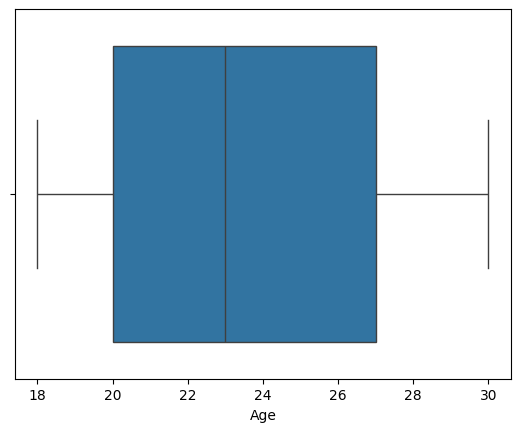

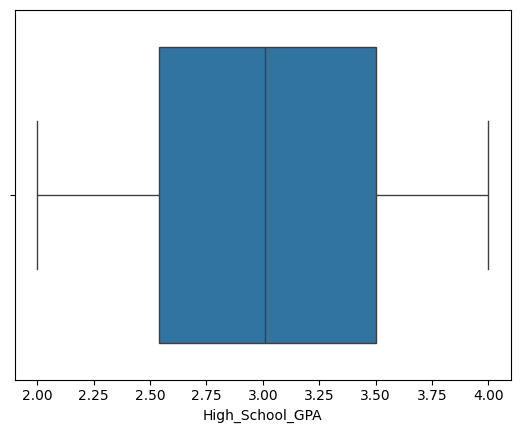

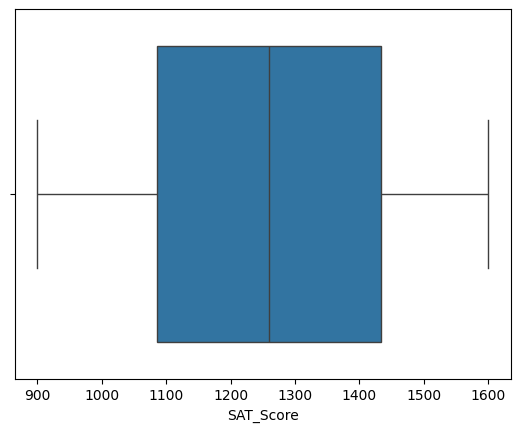

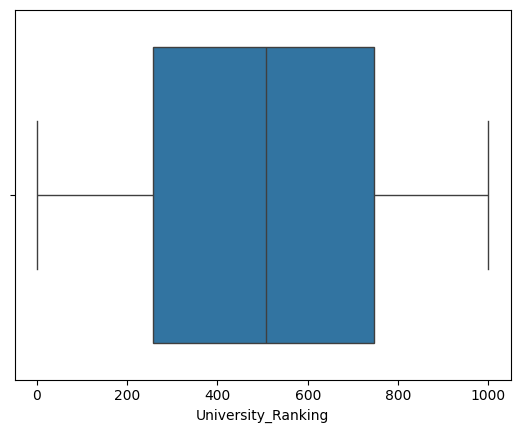

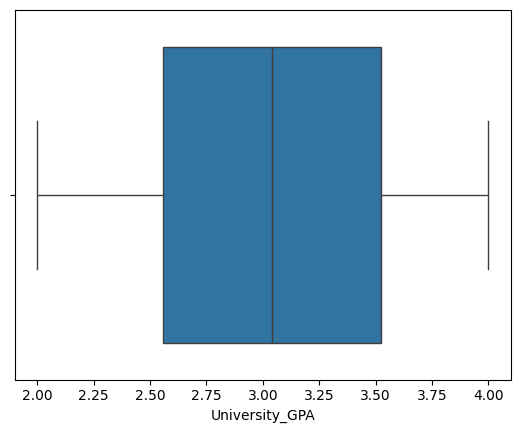

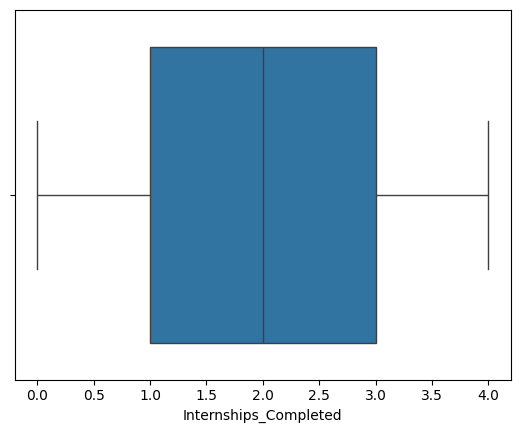

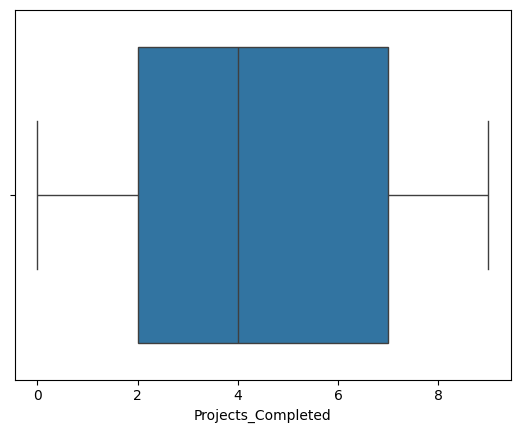

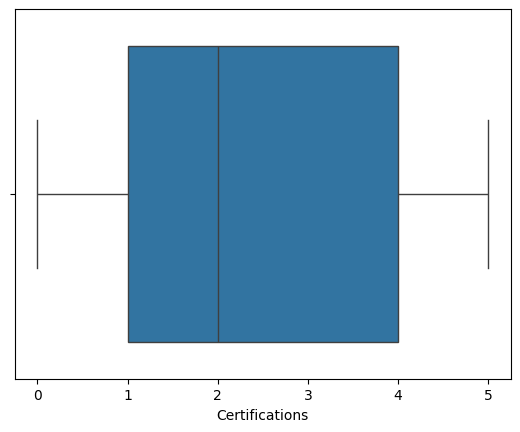

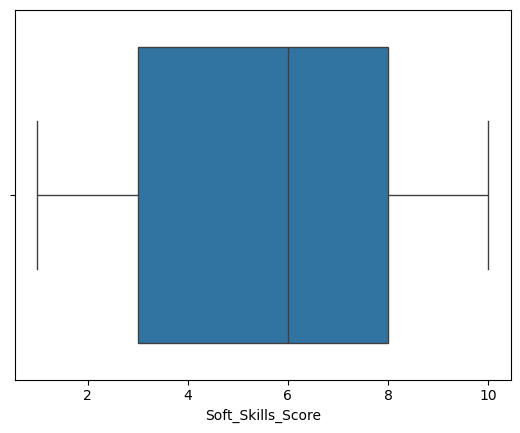

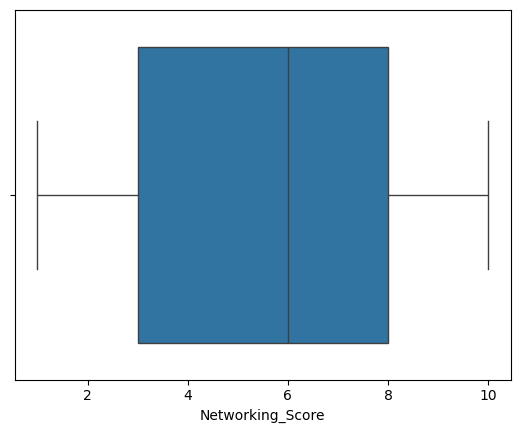

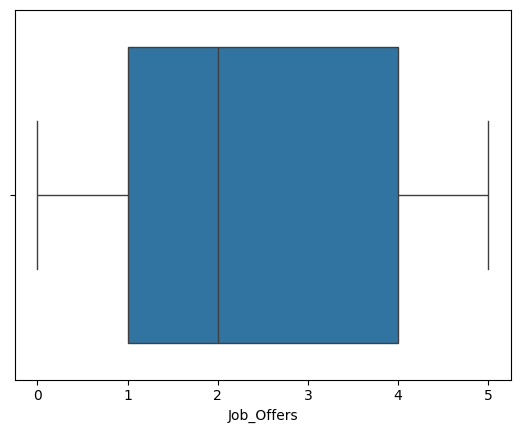

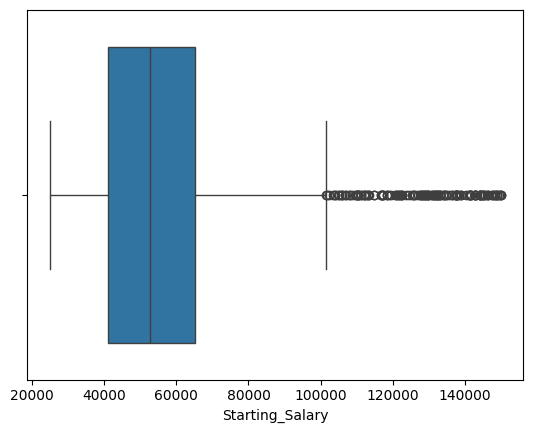

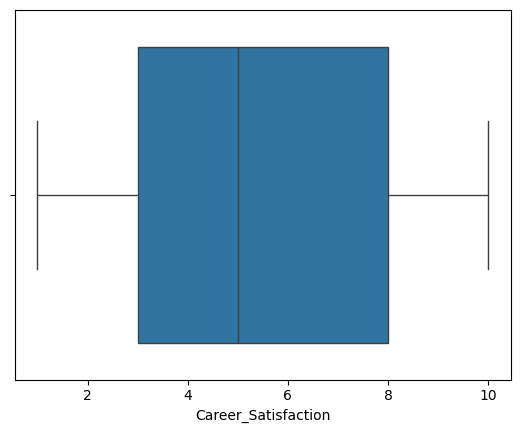

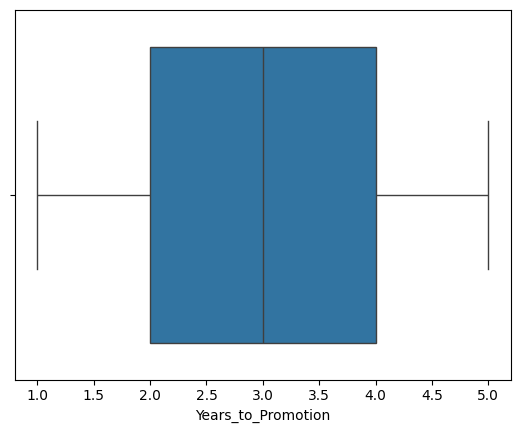

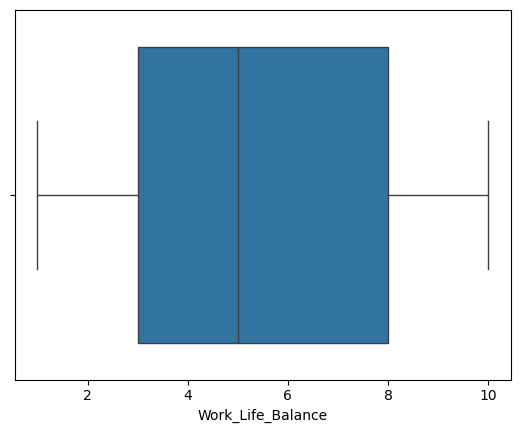

In [145]:
#Boxplot-to identify outlier
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [146]:
#correlation with heatmap to interpret the relation and multicollinearity
df.select_dtypes(include="number").corr()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
Age,1.000000,-0.007384,-0.009834,0.019797,0.016902,0.030303,-0.016257,0.013856,0.010551,-0.015283,-0.018087,0.046957,-0.007882,0.003360,-0.004409
High_School_GPA,-0.007384,1.000000,-0.009718,0.010799,0.006254,0.001100,-0.010738,-0.008555,0.011739,-0.009050,-0.009583,-0.015263,-0.015543,-0.014147,-0.022865
SAT_Score,-0.009834,-0.009718,1.000000,-0.001840,0.015029,-0.015110,-0.012466,-0.012702,-0.008541,-0.033355,0.048498,-0.009143,0.030414,-0.023519,0.019364
University_Ranking,0.019797,0.010799,-0.001840,1.000000,-0.018975,-0.042928,-0.006887,0.034535,0.003666,0.013470,0.025332,0.002776,-0.034562,-0.001633,-0.016388
University_GPA,0.016902,0.006254,0.015029,-0.018975,1.000000,-0.006619,-0.007576,0.022410,-0.032949,0.025843,-0.022468,-0.006517,0.000160,0.027970,0.007712
Internships_Completed,0.030303,0.001100,-0.015110,-0.042928,-0.006619,1.000000,0.014616,0.026203,0.002690,0.011015,0.027497,0.028486,0.024266,0.005295,0.022251
Projects_Completed,-0.016257,-0.010738,-0.012466,-0.006887,-0.007576,0.014616,1.000000,-0.017281,-0.017809,-0.023405,-0.007829,-0.005813,0.008656,-0.038793,-0.019103
Certifications,0.013856,-0.008555,-0.012702,0.034535,0.022410,0.026203,-0.017281,1.000000,0.011604,0.003287,0.000824,-0.007014,0.036939,-0.003372,-0.029170
Soft_Skills_Score,0.010551,0.011739,-0.008541,0.003666,-0.032949,0.002690,-0.017809,0.011604,1.000000,0.010949,-0.031718,-0.006398,0.018756,-0.018722,-0.007670
Networking_Score,-0.015283,-0.009050,-0.033355,0.013470,0.025843,0.011015,-0.023405,0.003287,0.010949,1.000000,-0.018106,0.020100,0.028136,0.005692,0.005316


<Axes: >

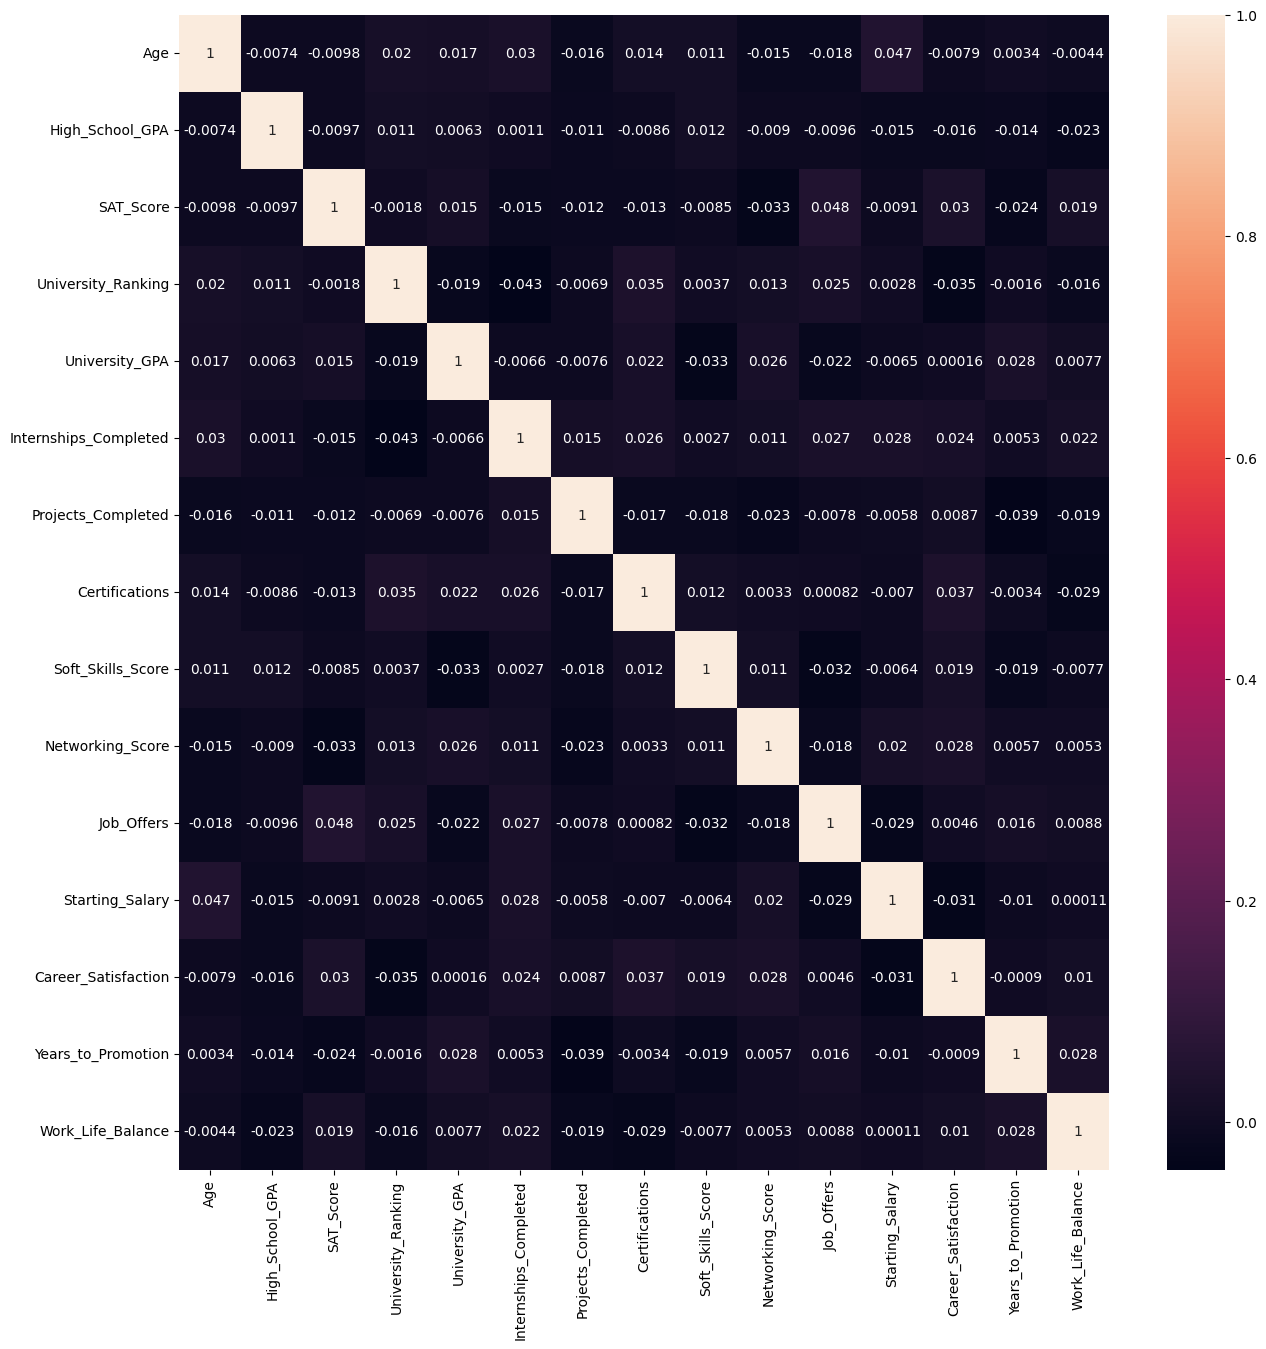

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)

In [148]:
#outlier treatment
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

lw,uw=wisker(df['Starting_Salary'])
df['Starting_Salary']=np.where(df['Starting_Salary']<lw,lw,df['Starting_Salary'])
df['Starting_Salary']=np.where(df['Starting_Salary']>uw,uw,df['Starting_Salary'])

<function matplotlib.pyplot.show(close=None, block=None)>

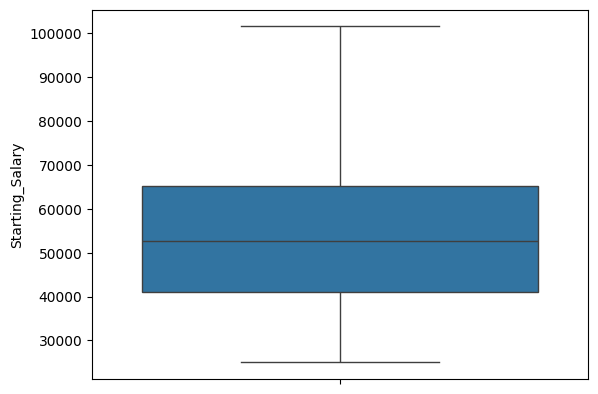

In [149]:
sns.boxplot(df['Starting_Salary'])
plt.show

In [150]:
#checking for standardization and normalization
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Check mean and standard deviation for Standardization
mean_values = numeric_cols.mean()
std_values = numeric_cols.std()

# Check min and max for Normalization
min_values = numeric_cols.min()
max_values = numeric_cols.max()

print("=== Checking for Standardization ===")
print("Means:\n", mean_values)
print("\nStandard Deviations:\n", std_values)

print("\n=== Checking for Normalization ===")
print("Minimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)

=== Checking for Standardization ===
Means:
 Age                         23.474870
High_School_GPA              3.010312
SAT_Score                 1256.805459
University_Ranking         502.697574
University_GPA               3.030013
Internships_Completed        1.972270
Projects_Completed           4.542461
Certifications               2.488302
Soft_Skills_Score            5.501300
Networking_Score             5.586222
Job_Offers                   2.466205
Starting_Salary          55204.162478
Career_Satisfaction          5.521664
Years_to_Promotion           3.021231
Work_Life_Balance            5.441075
dtype: float64

Standard Deviations:
 Age                          3.529033
High_School_GPA              0.565079
SAT_Score                  202.594575
University_Ranking         286.996262
University_GPA               0.572037
Internships_Completed        1.408105
Projects_Completed           2.837366
Certifications               1.718192
Soft_Skills_Score            2.870488
Netwo

Skewness of each numeric column:
 Age                      0.071995
High_School_GPA         -0.006136
SAT_Score               -0.016982
University_Ranking      -0.014724
University_GPA          -0.066347
Internships_Completed    0.035207
Projects_Completed      -0.006411
Certifications           0.028847
Soft_Skills_Score       -0.010701
Networking_Score        -0.046693
Job_Offers               0.034761
Starting_Salary          0.708413
Career_Satisfaction      0.007444
Years_to_Promotion      -0.011865
Work_Life_Balance        0.021176
dtype: float64

Highly skewed columns (|skewness| > 1):
 Series([], dtype: float64)


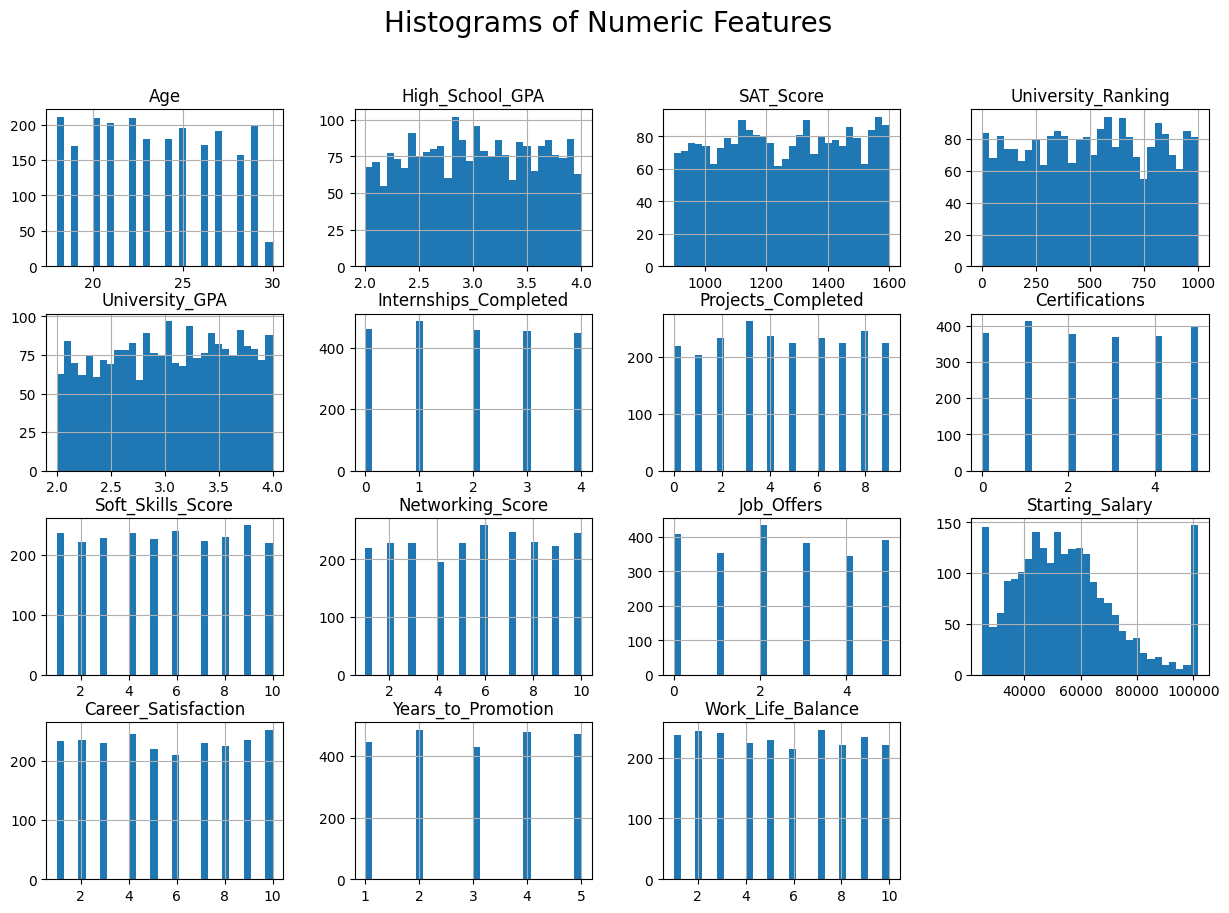

In [151]:
#checking for skewness
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculate skewness
skewness = numeric_cols.skew()

# Print skewness of all columns
print("Skewness of each numeric column:\n", skewness)

# Identify highly skewed columns
highly_skewed = skewness[abs(skewness) > 1]
print("\nHighly skewed columns (|skewness| > 1):\n", highly_skewed)

# Plot histograms
numeric_cols.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numeric Features', fontsize=20)
plt.show()

In [152]:
#  Apply One Hot Encoding only for feature columns
df1 = pd.get_dummies(df, columns=["Gender", "Field_of_Study", "Current_Job_Level"], drop_first=True)

# 4. Now df1 is your labeled dataset
print(df1.head())

  Student_ID  Age  High_School_GPA  SAT_Score  University_Ranking  \
0     S00001   20             3.13       1486                 949   
1     S00002   29             2.23       1508                 944   
2     S00003   29             3.48       1157                 102   
3     S00004   21             3.00        953                 397   
4     S00005   25             3.35       1469                  53   

   University_GPA  Internships_Completed  Projects_Completed  Certifications  \
0            2.19                      4                   1               3   
1            3.06                      1                   4               2   
2            2.63                      3                   8               5   
3            3.94                      0                   5               4   
4            2.49                      3                   5               4   

   Soft_Skills_Score  ...  Field_of_Study_Business  \
0                  6  ...                    False

In [153]:
# Separate features (X) and target (y)
x= df1.drop(columns=["Entrepreneurship", "Student_ID"])
y= df1["Entrepreneurship"].map({"Yes": 1, "No": 0})  # Map target into 0 and 1
#print(x.head())
#print(y.head())

In [154]:
# 3. Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [157]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


# Logistic regression

In [158]:
#  Build and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [159]:
#  Predict on test set
y_pred = model.predict(x_test)


In [160]:
#  Evaluate model

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
cm= confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity  : {specificity:.2f}")


Confusion Matrix:
 [[205  30]
 [ 40 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       235
           1       0.86      0.82      0.84       227

    accuracy                           0.85       462
   macro avg       0.85      0.85      0.85       462
weighted avg       0.85      0.85      0.85       462

Specificity  : 0.87


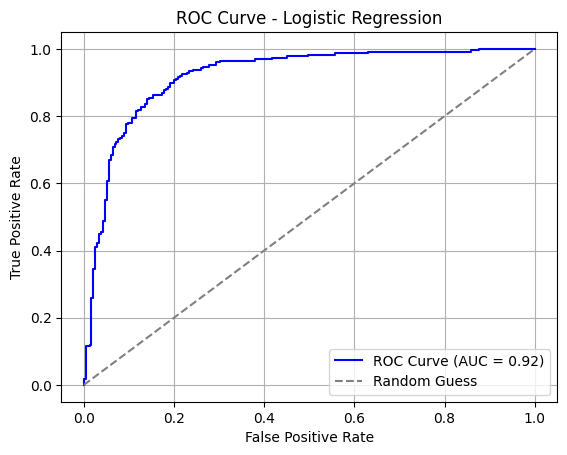

In [161]:
# Get probability estimates for the positive class (class 1)
y_prob = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# SVM


=== Fold 1 ===
Confusion Matrix:
 [[100  16]
 [ 16  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       116
           1       0.86      0.86      0.86       115

    accuracy                           0.86       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.86      0.86      0.86       231

Accuracy: 0.8615, Precision: 0.8615, Recall: 0.8615, F1: 0.8615, Specificity: 0.8621

=== Fold 2 ===
Confusion Matrix:
 [[104  12]
 [ 17  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       116
           1       0.89      0.85      0.87       115

    accuracy                           0.87       231
   macro avg       0.88      0.87      0.87       231
weighted avg       0.88      0.87      0.87       231

Accuracy: 0.8745, Precision: 0.8752, Recall: 0.8744, F1: 0.8744, Specificity: 0.8966

=== Fold 3 

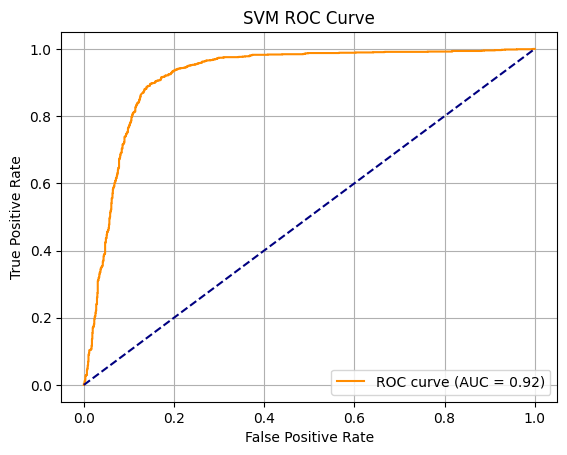

In [162]:

# Initialize model with probability=True
model = SVC(kernel='linear', probability=True)

# Cross-validation setup
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Track metrics
accuracies, precisions, recalls, f1_scores, specificities = [], [], [], [], []
all_y_true, all_y_pred, all_probs = [], [], []

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(x_scaled, y)):
    X_train, X_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_probs.extend(y_prob)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Specificity per class
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Save metrics
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    specificities.append(specificity)

    # Print per fold
    print(f"\n=== Fold {fold+1} ===")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, Specificity: {specificity:.4f}")

# Final confusion matrix
final_cm = confusion_matrix(all_y_true, all_y_pred)
print("\n=== Final Results Across All Folds ===")
print("Final Confusion Matrix:\n", final_cm)
print("Classification Report:\n", classification_report(all_y_true, all_y_pred))
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
print(f"Average Specificity: {np.mean(specificities):.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(all_y_true, all_probs)
roc_auc = roc_auc_score(all_y_true, all_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

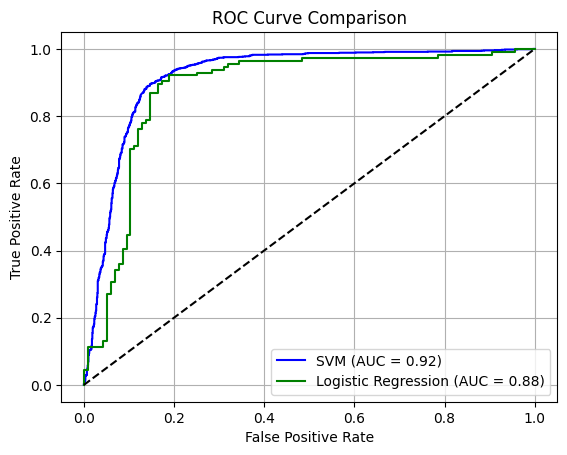

In [163]:
# For SVM
fpr_svm, tpr_svm, _ = roc_curve(all_y_true, all_probs)
auc_svm = roc_auc_score(all_y_true, all_probs)

# For Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob)
auc_log = roc_auc_score(y_test, y_prob)

# Plot both curves
plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='blue')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()